In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
drivers = pd.read_csv("drivers.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
driver_standings = pd.read_csv("driver_standings.csv")
seasons = pd.read_csv("seasons.csv")
constructors = pd.read_csv("constructors.csv")

### Data Exploration

In [5]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [13]:
drivers = drivers.rename(columns={'forename': 'first_name'})

In [4]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [6]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34863 entries, 0 to 34862
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34863 non-null  int64  
 1   raceId             34863 non-null  int64  
 2   driverId           34863 non-null  int64  
 3   points             34863 non-null  float64
 4   position           34863 non-null  int64  
 5   positionText       34863 non-null  object 
 6   wins               34863 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ MB


In [8]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   raceId  1125 non-null   int64
 1   year    1125 non-null   int64
dtypes: int64(2)
memory usage: 17.7 KB


In [ ]:
races = races[['raceId', 'year']] # filtering the races table

In [9]:
driver_standings = driver_standings.merge(races, how='left', on ='raceId')

In [10]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year
0,1,18,1,10.0,1,1,1,2008
1,2,18,2,8.0,2,2,0,2008
2,3,18,3,6.0,3,3,0,2008
3,4,18,4,5.0,4,4,0,2008
4,5,18,5,4.0,5,5,0,2008


In [11]:
# grouping driver id with year
season_summary = driver_standings.groupby(['driverId', 'year']).agg({
    'points': 'sum',
    'wins': 'sum'
}).reset_index()

In [ ]:
season_summary.head() # summarising the drivers performance across the years

,driverId,year,points,wins
0,1,2007,1096.0,33
1,1,2008,952.0,52
2,1,2009,337.0,12
3,1,2010,2415.0,32
4,1,2011,2381.0,29


In [ ]:
#merging saeasin summary with driver details
season_summary = season_summary.merge(drivers[['driverId', 'first_name', 'surname', 'nationality', 'dob']],how='left', on='driverId')

In [16]:
season_summary.head()

,driverId,year,points,wins,first_name,surname,nationality,dob
0,1,2007,1096.0,33,Lewis,Hamilton,British,1985-01-07
1,1,2008,952.0,52,Lewis,Hamilton,British,1985-01-07
2,1,2009,337.0,12,Lewis,Hamilton,British,1985-01-07
3,1,2010,2415.0,32,Lewis,Hamilton,British,1985-01-07
4,1,2011,2381.0,29,Lewis,Hamilton,British,1985-01-07


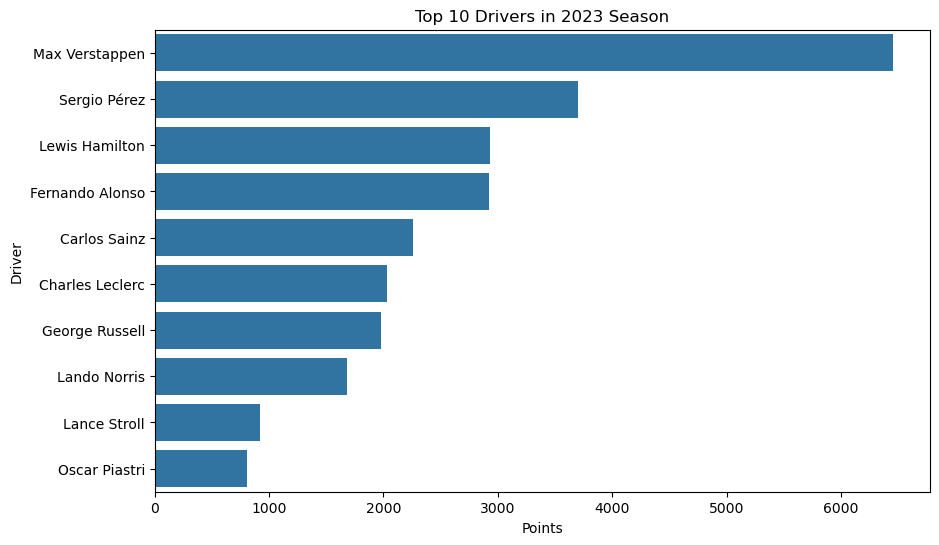

In [ ]:
# Top 10 drivers in 2023
top_drivers_2023 = season_summary[season_summary['year'] == 2023].sort_values(by='points', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_drivers_2023, x='points', y=top_drivers_2023['first_name'] + ' ' + top_drivers_2023['surname'])
plt.title('Top 10 Drivers in 2023 Season')
plt.xlabel('Points')
plt.ylabel('Driver')
plt.show()

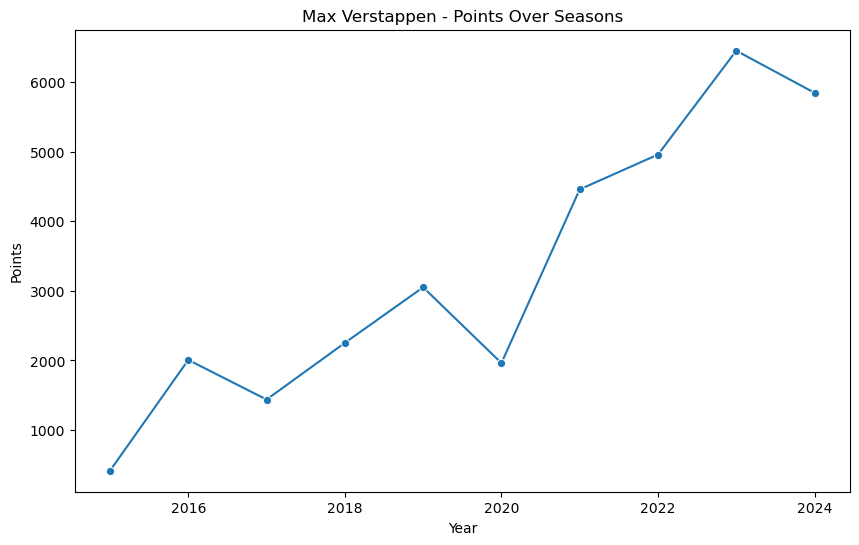

In [ ]:
#Max verstappen performance in Formula 1
driver_name = 'Max Verstappen'
driver_data = season_summary[(season_summary['first_name'] == 'Max') & (season_summary['surname'] == 'Verstappen')]

plt.figure(figsize=(10,6))
sns.lineplot(data=driver_data, x='year', y='points', marker='o')
plt.title('Max Verstappen - Points Over Seasons')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

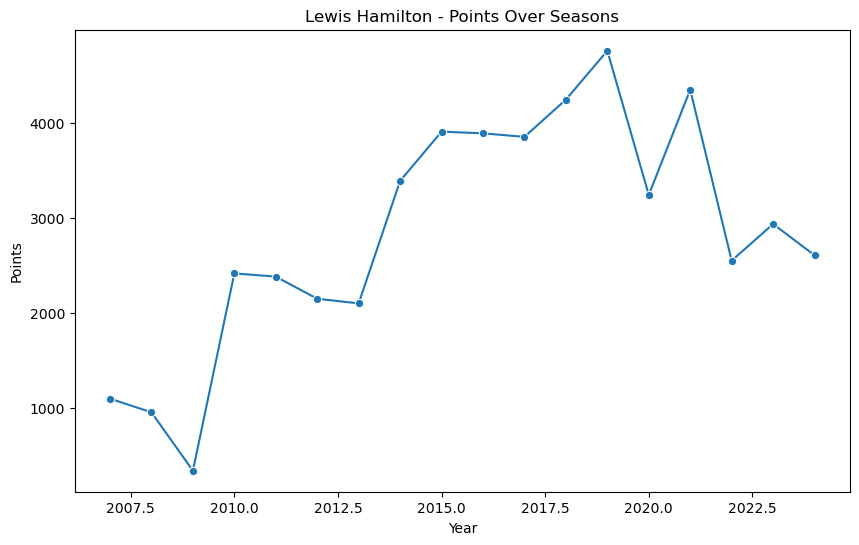

In [ ]:
#Lewis Hamilton performance in formula 1
driver_name = 'Lewis Hamilton'
driver_data = season_summary[(season_summary['first_name'] == 'Lewis') & (season_summary['surname'] == 'Hamilton')]

plt.figure(figsize=(10,6))
sns.lineplot(data=driver_data, x='year', y='points', marker='o')
plt.title('Lewis Hamilton - Points Over Seasons')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

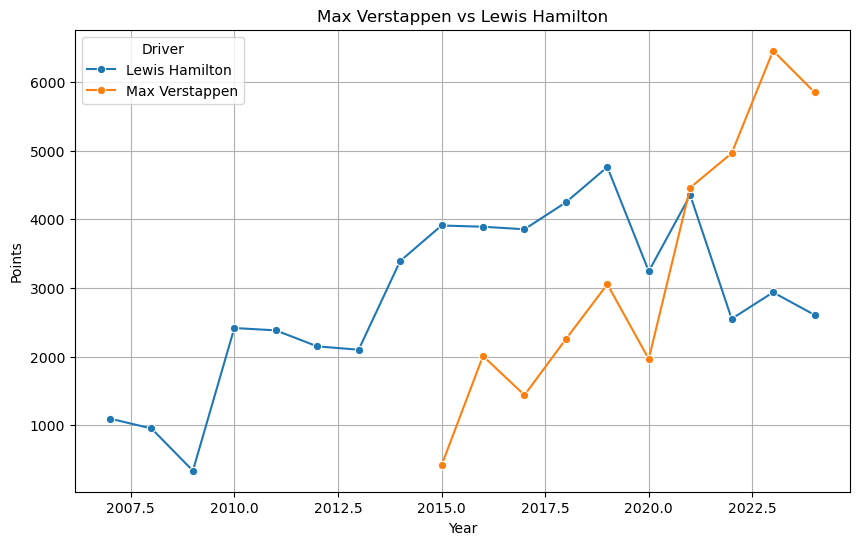

In [22]:
# Filter data for both drivers
drivers_to_compare = ['Max Verstappen', 'Lewis Hamilton']

# Create a full name column to make filtering easier
season_summary['full_name'] = season_summary['first_name'] + ' ' + season_summary['surname']

# Filter the DataFrame
comparison_df = season_summary[season_summary['full_name'].isin(drivers_to_compare)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_df, x='year', y='points', hue='full_name', marker='o')
plt.title('Max Verstappen vs Lewis Hamilton')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver')
plt.grid(True)
plt.show()

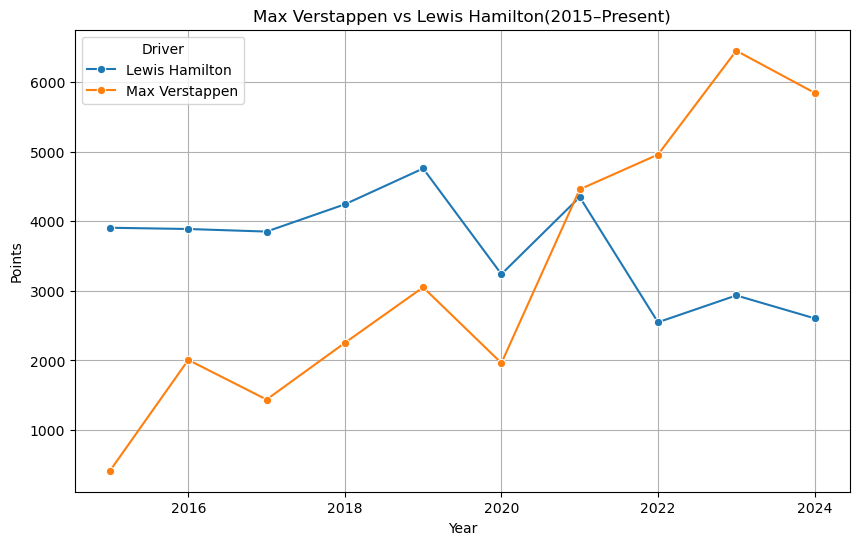

In [23]:
# data from 2015 onwards
comparison_df = season_summary[
    (season_summary['full_name'].isin(['Max Verstappen', 'Lewis Hamilton'])) &
    (season_summary['year'] >= 2015)
]

plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_df, x='year', y='points', hue='full_name', marker='o')
plt.title('Max Verstappen vs Lewis Hamilton(2015–Present)')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver')
plt.grid(True)
plt.show()

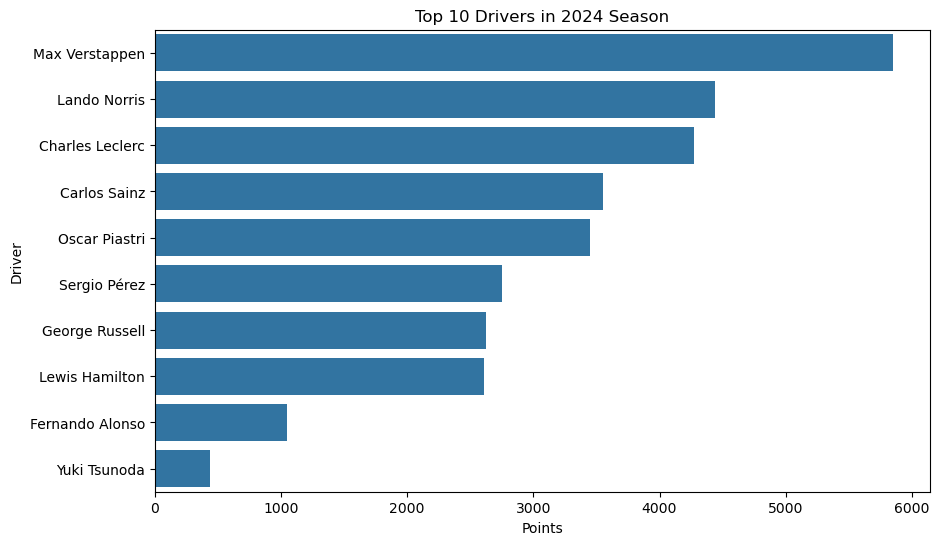

In [24]:
#Top drivers 2024
top_drivers_2024 = season_summary[season_summary['year'] == 2024].sort_values(by='points', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_drivers_2024, x='points', y=top_drivers_2024['first_name'] + ' ' + top_drivers_2024['surname'])
plt.title('Top 10 Drivers in 2024 Season')
plt.xlabel('Points')
plt.ylabel('Driver')
plt.show()

In [25]:
season_summary.head()

,driverId,year,points,wins,first_name,surname,nationality,dob,full_name
0,1,2007,1096.0,33,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton
1,1,2008,952.0,52,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton
2,1,2009,337.0,12,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton
3,1,2010,2415.0,32,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton
4,1,2011,2381.0,29,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton


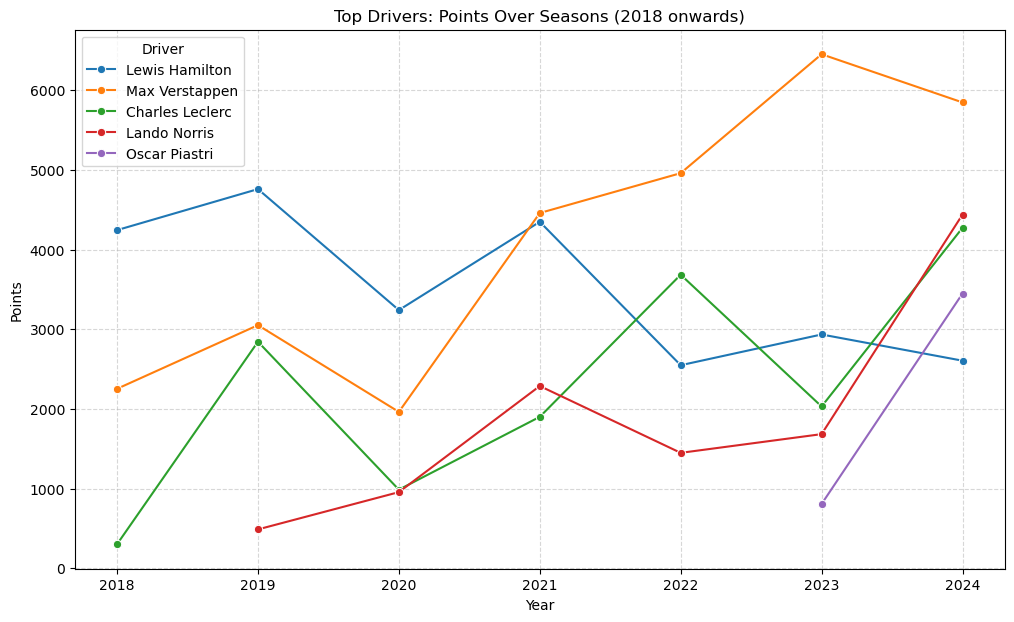

In [27]:
# top drivers 2018 onwards
drivers_to_track = ['Lewis Hamilton','Max Verstappen','Lando Norris','Charles Leclerc','Oscar Piastri']

filtered = season_summary[
    (season_summary['full_name'].isin(drivers_to_track)) & 
    (season_summary['year'] >= 2018)
]
plt.figure(figsize=(12,7))
sns.lineplot(data=filtered, x='year', y='points', hue='full_name', marker='o')
plt.title('Top Drivers: Points Over Seasons (2018 onwards)')
plt.xlabel('Year')
plt.ylabel('Points')
plt.xticks(range(2018, 2025)) 
plt.legend(title='Driver')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

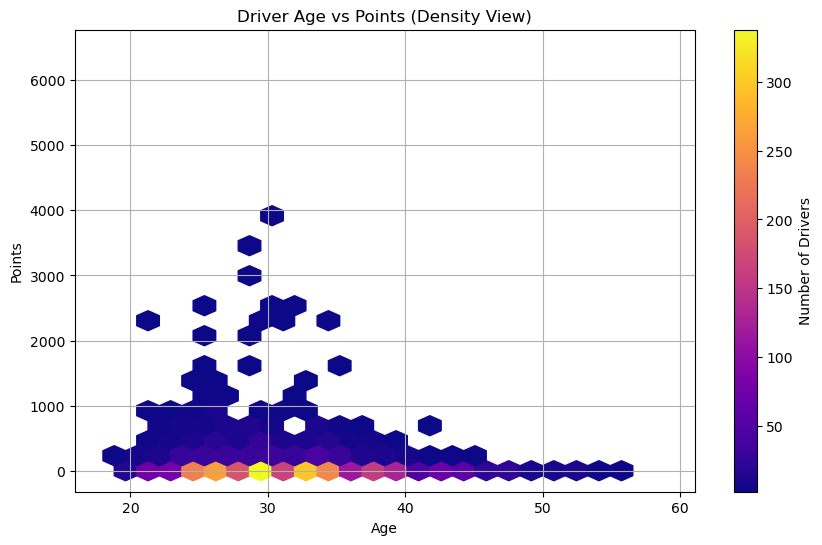

In [ ]:
#Driver age vs points
# Convert 'dob' column to datetime 
season_summary['dob'] = pd.to_datetime(season_summary['dob'])

# Create 'age' column
season_summary['age'] = season_summary['year'] - season_summary['dob'].dt.year

plt.figure(figsize=(10, 6))
plt.hexbin(season_summary['age'], season_summary['points'], gridsize=25, cmap='plasma', mincnt=2)
plt.colorbar(label='Number of Drivers')
plt.title('Driver Age Distribution vs Points (Density View)')
plt.xlabel('Age')
plt.ylabel('Points')
plt.grid(True)
plt.show()

### Prediction with RandomForest Regressor

In [30]:
season_summary.head()

,driverId,year,points,wins,first_name,surname,nationality,dob,full_name,age
0,1,2007,1096.0,33,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,22
1,1,2008,952.0,52,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,23
2,1,2009,337.0,12,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,24
3,1,2010,2415.0,32,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,25
4,1,2011,2381.0,29,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,26


In [31]:
#experience calculation
first_year = season_summary.groupby('driverId')['year'].min().reset_index()
first_year.columns = ['driverId', 'debut_year']

season_summary = season_summary.merge(first_year, on='driverId', how='left')

season_summary['experience'] = season_summary['year'] - season_summary['debut_year']

In [32]:
season_summary.head()

,driverId,year,points,wins,first_name,surname,nationality,dob,full_name,age,debut_year,experience
0,1,2007,1096.0,33,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,22,2007,0
1,1,2008,952.0,52,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,23,2007,1
2,1,2009,337.0,12,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,24,2007,2
3,1,2010,2415.0,32,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,25,2007,3
4,1,2011,2381.0,29,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,26,2007,4


In [33]:
season_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverId     3192 non-null   int64         
 1   year         3192 non-null   int64         
 2   points       3192 non-null   float64       
 3   wins         3192 non-null   int64         
 4   first_name   3192 non-null   object        
 5   surname      3192 non-null   object        
 6   nationality  3192 non-null   object        
 7   dob          3192 non-null   datetime64[ns]
 8   full_name    3192 non-null   object        
 9   age          3192 non-null   int64         
 10  debut_year   3192 non-null   int64         
 11  experience   3192 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 299.4+ KB


In [34]:
features = ['age', 'wins', 'experience']
target = 'points'

In [ ]:
#train-test split
train = season_summary[season_summary['year'] < 2024]

test = season_summary[season_summary['year'] == 2024]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [36]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set (2024)
y_pred = rf_model.predict(X_test)


In [44]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance on 2024 Test Set:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


Random Forest Regressor Performance on 2024 Test Set:
MAE:  794.56
RMSE: 1284.15
R²:   0.47


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
comparison = X_test.copy()
comparison['Actual_Points'] = y_test.values
comparison['Predicted_Points'] = y_pred

# Sort by predicted points for better readability
comparison = comparison.sort_values(by='Predicted_Points', ascending=False)
comparison.head(10)

,age,wins,experience,Actual_Points,Predicted_Points
3088,27,143,9,5848.0,4089.145000
3154,25,37,5,4440.0,2623.950000
61,43,0,23,1052.0,1885.000000
3184,23,20,1,3449.0,1327.289667
17,39,24,17,2606.0,1314.925000
3100,30,27,9,3549.0,1185.090000
3147,27,32,6,4274.0,913.070000
3160,26,17,5,2623.0,538.820000
3013,34,0,13,2751.0,525.866964
3126,26,0,7,422.0,352.563285


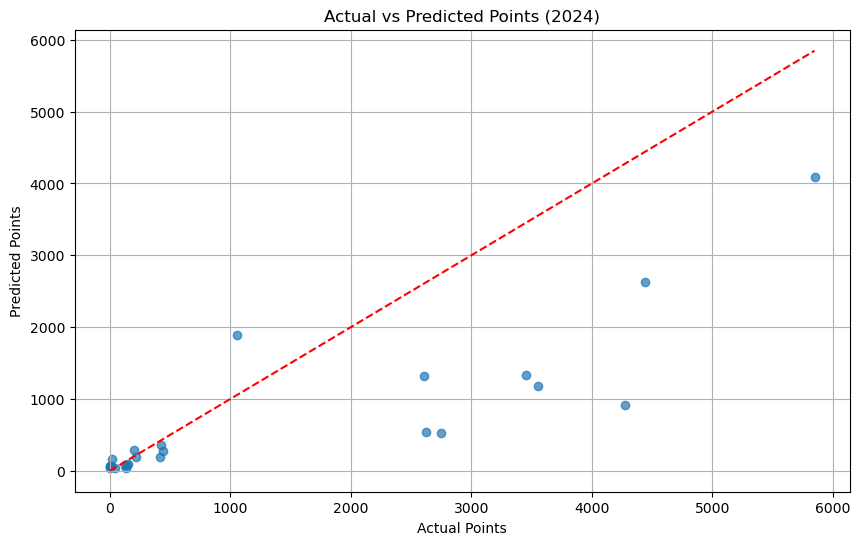

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y = x line
plt.title('Actual vs Predicted Points (2024)')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.grid(True)
plt.show()

In [49]:
# Add driverId and experience from test set to comparison
comparison['driverId'] = test['driverId'].values
comparison['experience'] = test['experience'].values

# Merge with season_summary to get driver names
comparison = comparison.merge(
    season_summary[['driverId', 'first_name', 'surname', 'experience']],
    on=['driverId', 'experience'],
    how='left'
)

# Create full name column
comparison['driver_name'] = comparison['first_name'] + ' ' + comparison['surname']


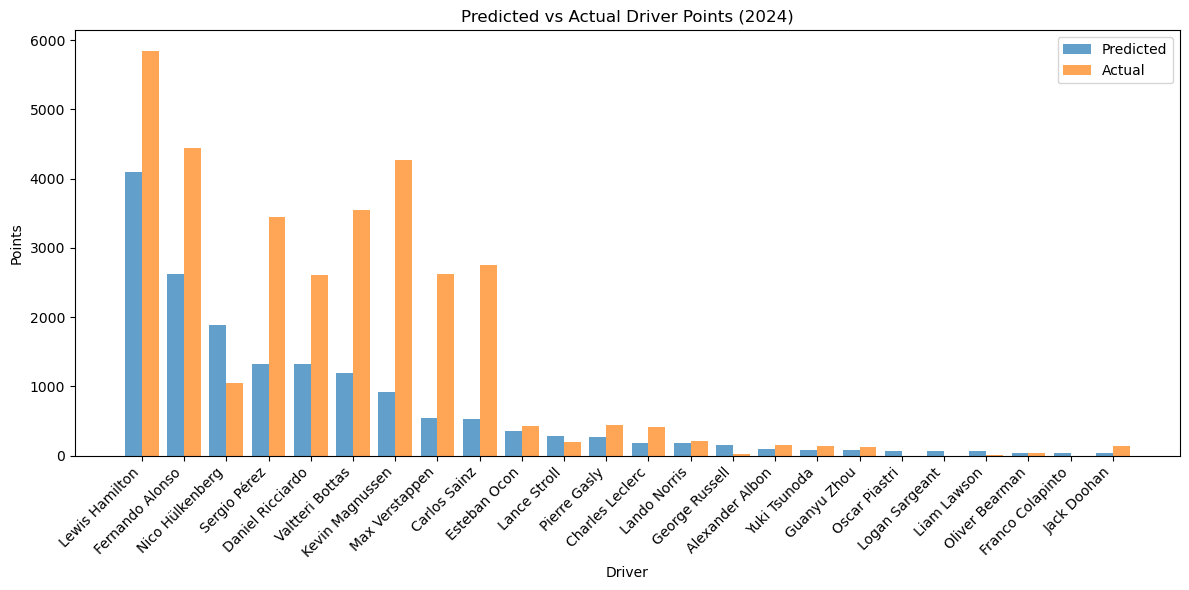

In [50]:
# Sort by predicted points for clearer bars
comparison = comparison.sort_values(by='Predicted_Points', ascending=False)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(comparison))

plt.bar(x, comparison['Predicted_Points'], width=bar_width, label='Predicted', alpha=0.7)
plt.bar([i + bar_width for i in x], comparison['Actual_Points'], width=bar_width, label='Actual', alpha=0.7)

plt.xticks([i + bar_width / 2 for i in x], comparison['driver_name'], rotation=45, ha='right')
plt.xlabel('Driver')
plt.ylabel('Points')
plt.title('Predicted vs Actual Driver Points (2024)')
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
season_summary.head()

,driverId,year,points,wins,first_name,surname,nationality,dob,full_name,age,debut_year,experience
0,1,2007,1096.0,33,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,22,2007,0
1,1,2008,952.0,52,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,23,2007,1
2,1,2009,337.0,12,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,24,2007,2
3,1,2010,2415.0,32,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,25,2007,3
4,1,2011,2381.0,29,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,26,2007,4


### Predict with linear regression

In [53]:
features = ['age', 'wins', 'experience']
target = 'points'

In [54]:
#train-test split
train = season_summary[season_summary['year'] < 2024]

test = season_summary[season_summary['year'] == 2024]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [55]:
#model training
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [56]:
#model evaluation
print("Linear Regression:")
print('RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))
print('R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression:
RMSE: 1498.8018877982217
R2 Score: 0.2776857786193443


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
#FOR DRIVERS IN 2024
drivers_2024 = season_summary[season_summary['year'] == 2024]
drivers_2025 = drivers_2024.copy()
drivers_2025['year'] = 2025
drivers_2025['age'] += 1
drivers_2025['wins'] = drivers_2024['wins']
drivers_2025['experience'] += 1
x_2025 = drivers_2025[['age', 'wins', 'experience']]
drivers_2025['full name'] = drivers_2025['first_name'] + ' ' + drivers_2025['surname']


In [59]:
x_2025.head()

,age,wins,experience
17,40,24,18
61,44,0,24
2981,38,0,15
3013,35,0,14
3029,36,0,14


In [60]:
#predict with linear regression
points_pred_2025 = lr.predict(x_2025)
drivers_2025['points_predicted'] = points_pred_2025 #predictions added to drivers 2025 table

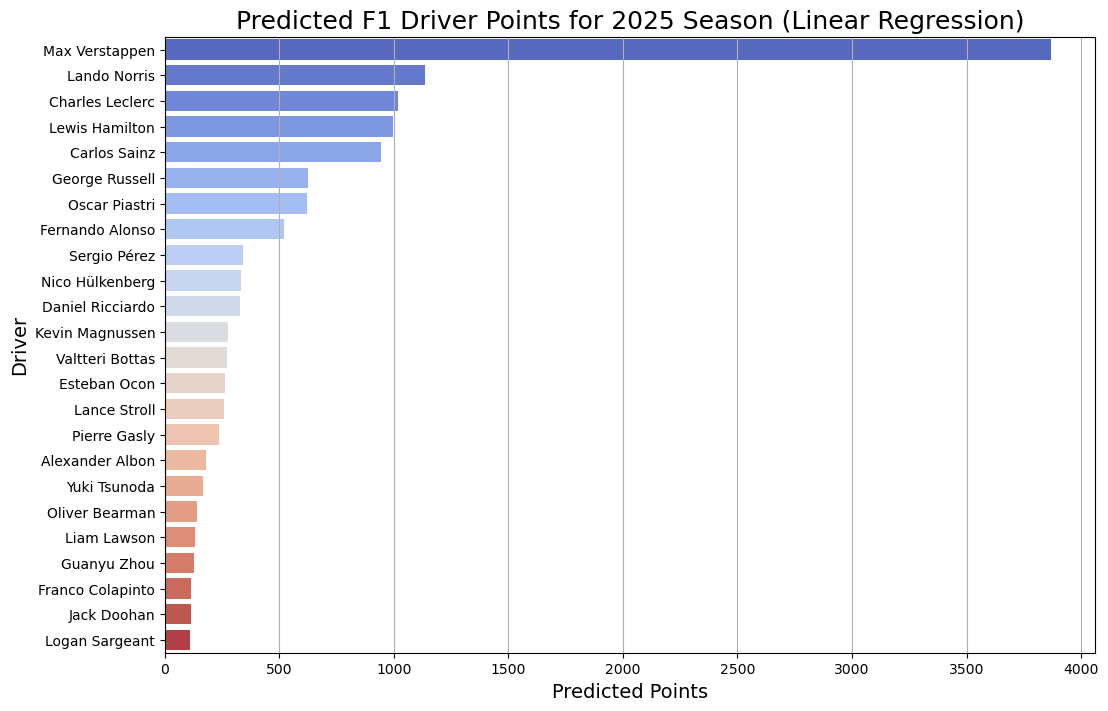

In [61]:
# Sort by predicted points
drivers_2025_sorted = drivers_2025.sort_values('points_predicted', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='points_predicted', y='full name', data=drivers_2025_sorted,  hue='full name', dodge=False, palette='coolwarm',legend=False)
plt.title('Predicted F1 Driver Points for 2025 Season (Linear Regression)', fontsize=18)
plt.xlabel('Predicted Points', fontsize=14)
plt.ylabel('Driver', fontsize=14)
plt.grid(axis='x')
plt.show()


### Creating Team Color visuals

In [62]:
drivers_2025.head()

,driverId,year,points,wins,first_name,surname,nationality,dob,full_name,age,debut_year,experience,full name,points_predicted
17,1,2025,2606.0,24,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,40,2007,18,Lewis Hamilton,994.963783
61,4,2025,1052.0,0,Fernando,Alonso,Spanish,1981-07-29,Fernando Alonso,44,2001,24,Fernando Alonso,522.018123
2981,807,2025,415.0,0,Nico,Hülkenberg,German,1987-08-19,Nico Hülkenberg,38,2010,15,Nico Hülkenberg,334.337283
3013,815,2025,2751.0,0,Sergio,Pérez,Mexican,1990-01-26,Sergio Pérez,35,2011,14,Sergio Pérez,339.238177
3029,817,2025,198.0,0,Daniel,Ricciardo,Australian,1989-07-01,Daniel Ricciardo,36,2011,14,Daniel Ricciardo,328.200611


In [63]:
results_teams = results.merge(constructors, how='left' , on='constructorId')

In [64]:
# Merging drivers_2025  with the team info
drivers_2025 = drivers_2025.merge(
    results_teams[['driverId', 'name']],
    how='left',
    on='driverId'
)

In [65]:
drivers_2025.head()

,driverId,year,points,wins,first_name,surname,nationality,dob,full_name,age,debut_year,experience,full name,points_predicted,name
0,1,2025,2606.0,24,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,40,2007,18,Lewis Hamilton,994.963783,McLaren
1,1,2025,2606.0,24,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,40,2007,18,Lewis Hamilton,994.963783,McLaren
2,1,2025,2606.0,24,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,40,2007,18,Lewis Hamilton,994.963783,McLaren
3,1,2025,2606.0,24,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,40,2007,18,Lewis Hamilton,994.963783,McLaren
4,1,2025,2606.0,24,Lewis,Hamilton,British,1985-01-07,Lewis Hamilton,40,2007,18,Lewis Hamilton,994.963783,McLaren


In [66]:
drivers_2025.rename(columns={'name': 'team'}, inplace=True)

In [67]:
drivers_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   driverId          3632 non-null   int64         
 1   year              3632 non-null   int64         
 2   points            3632 non-null   float64       
 3   wins              3632 non-null   int64         
 4   first_name        3632 non-null   object        
 5   surname           3632 non-null   object        
 6   nationality       3632 non-null   object        
 7   dob               3632 non-null   datetime64[ns]
 8   full_name         3632 non-null   object        
 9   age               3632 non-null   int64         
 10  debut_year        3632 non-null   int64         
 11  experience        3632 non-null   int64         
 12  full name         3632 non-null   object        
 13  points_predicted  3632 non-null   float64       
 14  team              3632 n

In [68]:
# Twam color dictionary
team_colors = {
    'Ferrari': '#DC0000',        # Ferrari Red
    'Red Bull': '#1E41FF',       # Red Bull Blue
    'Mercedes': '#00D2BE',       # Mercedes Teal
    'McLaren': '#FF8700',        # McLaren Papaya Orange
    'Alpine F1 Team': '#0090FF', # Alpine Blue
    'Aston Martin': '#006F62',   # Aston Martin Green
    'Williams': '#005AFF',       # Williams Blue
    'AlphaTauri': '#2B4562',     # AlphaTauri Dark Blue
    'Haas F1 Team': '#FFFFFF',   # Haas White
    'Stake F1 Team': '#52E252',  # Sauber/Stake Greenish
}

In [69]:
drivers_2025['team_color'] = drivers_2025['team'].map(team_colors)

In [70]:
drivers_2025_sorted = drivers_2025.sort_values('points_predicted', ascending=False)

In [71]:
drivers_2025_sorted['team_color'] = drivers_2025_sorted['team_color'].fillna('#808080')

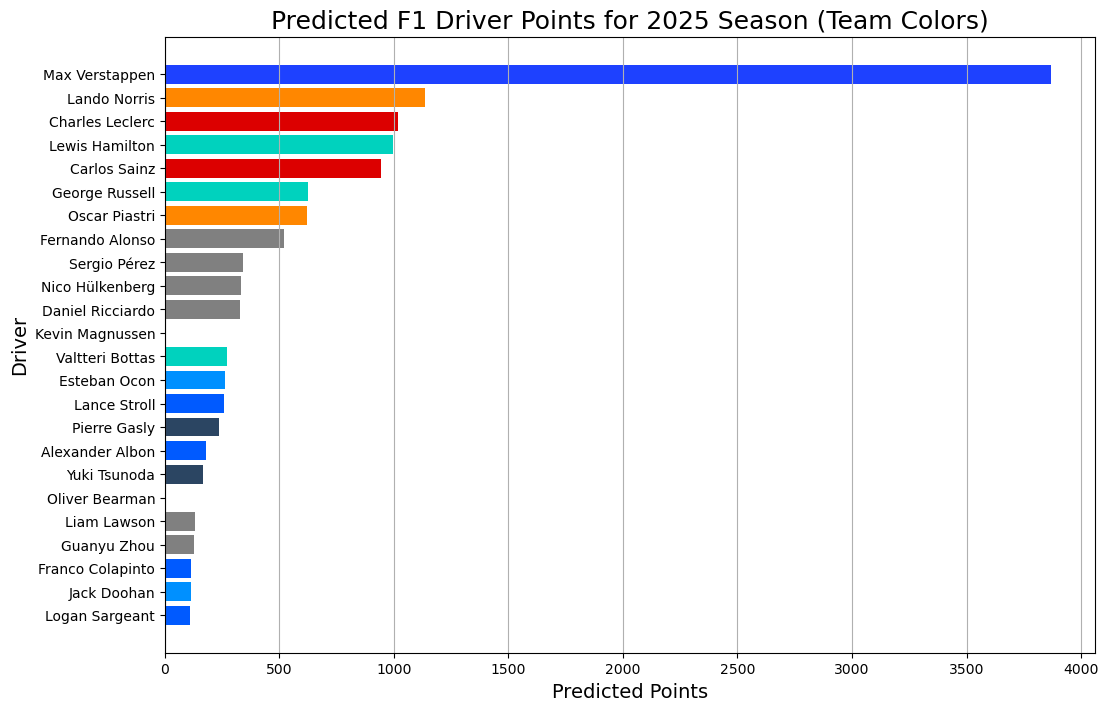

In [74]:
# Set figure size
plt.figure(figsize=(12, 8))

# Loop to draw each bar individually with its own color
for idx, row in drivers_2025_sorted.iterrows():
    plt.barh(
        row['full name'],
        row['points_predicted'],
        color=row['team_color']
    )

plt.title('Predicted F1 Driver Points for 2025 Season (Team Colors)', fontsize=18)
plt.xlabel('Predicted Points', fontsize=14)
plt.ylabel('Driver', fontsize=14)
plt.grid(axis='x')
plt.gca().invert_yaxis()  # Highest points on top
plt.show()
